##**Modelo 2**
###Equipo 2
####Norma Esthela Figueroa Flores 1850281
####Lydia Sofía Ramírez Velez 1827198
####Marcela Reyes Arévalo 1841372
####Diana Itzel Barrón Medina 1802474     	
####Tania Elizabeth Frías López 1843664

### Importar Las Librerias

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
%matplotlib inline
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
import keras
from keras.layers.advanced_activations import LeakyReLU

### Descargar y preparar el conjunto de datos CIFAR100

In [24]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar100.load_data(label_mode='coarse')

#scale pixels
def prep_pixels(train, test):
 #convert from integers to floats
 train_norm = train.astype('float32')
 test_norm = test.astype('float32')
 #normalize to range 0-1
 train_norm = train_norm/255.0
 test_norm = test_norm/255.0
 #return normalized images
 return train_norm, test_norm

 #Prepare pixel data
 train_images, test_images = prep_pixels(train_images, test_images)


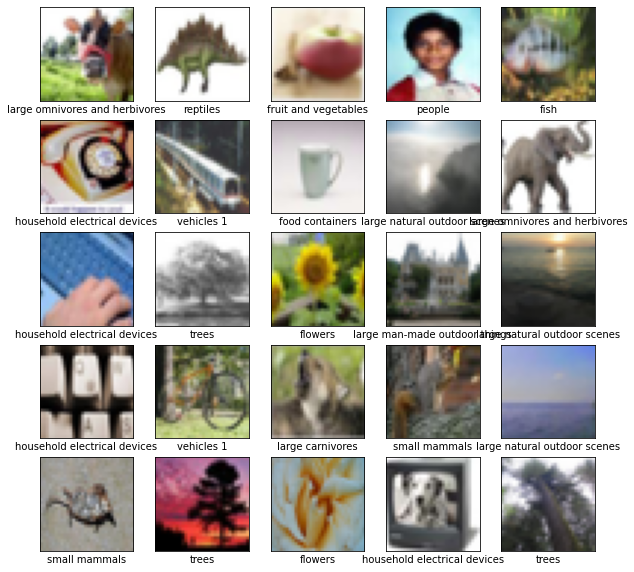

In [25]:
class_names=['aquatic mammals','fish','flowers','food containers','fruit and vegetables','household electrical devices',
             'household furniture','insects','large carnivores','large man-made outdoor things','large natural outdoor scenes',
             'large omnivores and herbivores', 'medium-sized mammals','non-insect invertebrates','people','reptiles',
             'small mammals','trees','vehicles 1','vehicles 2']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  #The CIFAR labels happen to be arrays, which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

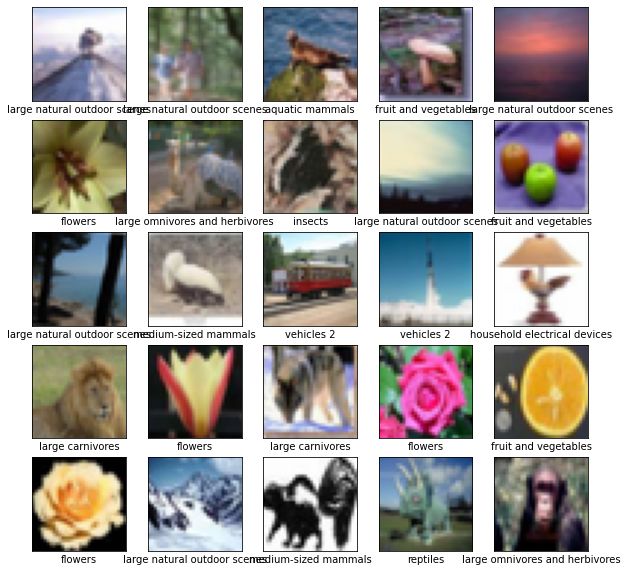

In [26]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(test_images[i])
  #The CIFAR labels happen to be arrays, which is why you need the extra index
  plt.xlabel(class_names[test_labels[i][0]])
plt.show()

### Creación del modelo

In [27]:
model = models.Sequential()

model.add(layers.Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3,),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256,(3,3),activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256,(3,3), activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(1024,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(1024,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))


In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                      

### Agregue capas densas en la parte superior

In [29]:
#flattening
model.add(layers.Flatten())

#full connection
model.add(layers.Dense(100,activation='relu', kernel_initializer='he_uniform'))

#full connection
model.add(layers.Dense(1000, activation='relu',kernel_initializer='he_uniform'))

#output layer
model.add(layers.Dense(20,activation='softmax'))

### Resumen del modelo

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 128)       147584    
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 128)      512       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                      

In [31]:
#early stopping to monitor the validation loss and avoid overfitting
early_stop =EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#reducing learning rate on plateau
rlrop= ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.5, min_lr=1e-6, verbose=1)

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(train_images, train_labels, batch_size=64, epochs=35, callbacks =[early_stop, rlrop],
                  verbose=1, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/35
782/782 [==============================] - 103s 130ms/step - loss: 2.7436 - accuracy: 0.1507 - val_loss: 2.8298 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 2/35
782/782 [==============================] - 101s 129ms/step - loss: 2.2644 - accuracy: 0.2783 - val_loss: 2.7188 - val_accuracy: 0.2602 - lr: 0.0010
Epoch 3/35
782/782 [==============================] - 101s 129ms/step - loss: 1.8000 - accuracy: 0.4276 - val_loss: 3.2480 - val_accuracy: 0.1598 - lr: 0.0010
Epoch 4/35
782/782 [==============================] - 100s 128ms/step - loss: 1.5394 - accuracy: 0.5114 - val_loss: 1.4259 - val_accuracy: 0.5487 - lr: 0.0010
Epoch 5/35
782/782 [==============================] - 101s 129ms/step - loss: 1.2418 - accuracy: 0.6036 - val_loss: 1.4404 - val_accuracy: 0.5460 - lr: 0.0010
Epoch 6/35
782/782 [==============================] - 100s 128ms/step - loss: 1.0524 - accuracy: 0.6612 - val_loss: 1.2057 - val_accuracy: 0.6197 - lr: 0.0010
Epoch 7/35
782/782 [==========================

### Evaluar el modelo

313/313 - 8s - loss: 2.4048 - accuracy: 0.6713 - 8s/epoch - 25ms/step


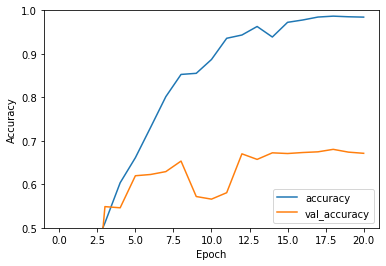

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [33]:
print(test_acc)

0.6712999939918518
